# ##Import Libraries


In [ ]:
!pip install pandas matplotlib seaborn numpy


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# Set style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


# ##Load the data

In [4]:
df = pd.read_csv('Anime.csv')

# ## 🔎 Initial Inspection

In [5]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14209 entries, 0 to 14208
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        14209 non-null  object 
 1   title                     14209 non-null  object 
 2   titleJa                   13486 non-null  object 
 3   titleEn                   7039 non-null   object 
 4   image                     14169 non-null  object 
 5   mean                      12083 non-null  float64
 6   rank                      10486 non-null  float64
 7   num_list_users            13490 non-null  float64
 8   num_scoring_users         13487 non-null  float64
 9   num_episodes              13493 non-null  float64
 10  start_date                14209 non-null  object 
 11  end_date                  14147 non-null  object 
 12  media_type                14209 non-null  object 
 13  status                    14209 non-null  object 
 14  rating

,id,title,titleJa,titleEn,image,mean,rank,num_list_users,num_scoring_users,num_episodes,start_date,end_date,media_type,status,rating,average_episode_duration,genres,studios
0,1,Cowboy Bebop???,カウボーイビバップ,Cowboy Bebop!!,https://cdn.myanimelist.net/images/anime/4/196...,8.75,47.0,1957906.0,NaN,26.0,03-04-1998,24-04-1999,tv,finished_airing,r,1440,"Action, Adult Cast, Award Winning, Sci-Fi, Space",Sunrise
1,5,Cowboy Bebop: Tengoku no Tobira,カウボーイビバップ 天国の扉,Cowboy Bebop: The Movie,https://cdn.myanimelist.net/images/anime/1439/...,8.38,215.0,395149.0,223905.0,1.0,01-09-2001,01-09-2001,movie,finished_airing,r,6911,"Action, Adult Cast, Sci-Fi, Space",Bones
2,6,Trigun,トライガン???,Trigun,https://cdn.myanimelist.net/images/anime/1130/...,8.22,376.0,797512.0,386757.0,NaN,01-04-1998,30-09-1998,tv,finished_airing,pg_13,1480,"Action, Adult Cast, Adventure, Sci-Fi, Shounen",Madhouse
3,7,Witch Hunter Robin!!,Witch Hunter ROBIN (ウイッチハンターロビン)???,Witch Hunter Robin!!,https://cdn.myanimelist.net/images/anime/10/19...,7.24,3163.0,122319.0,45154.0,26.0,03-07-2002,25-12-2002,tv,finished_airing,pg_13,1500,"Action, Detective, Drama, Mystery, Supernatural",Sunrise
4,8,Bouken Ou Beet???,NaN,Beet the Vandel Buster,https://cdn.myanimelist.net/images/anime/7/215...,6.93,4693.0,16217.0,6945.0,52.0,30-09-2004,29-09-2005,tv,finished_airing,pg,1380,"Action, Adventure, Fantasy, Shounen",Toei Animation


# ## 🧹 Data Cleaning

In [6]:
# - Converted dates and extracted year/decade.
# - Split genre strings into lists.
# - Converted numerical columns and dropped rows with missing important values.
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['start_year'] = df['start_date'].dt.year
df['decade'] = (df['start_year'] // 10) * 10

df['genres'] = df['genres'].str.split(', ')
df['mean'] = pd.to_numeric(df['mean'], errors='coerce')
df['num_episodes'] = pd.to_numeric(df['num_episodes'], errors='coerce')
df['average_episode_duration'] = pd.to_numeric(df['average_episode_duration'], errors='coerce')
df['num_list_users'] = pd.to_numeric(df['num_list_users'], errors='coerce')

# Drop rows with missing key values
df_genre = df[['decade', 'genres']].explode('genres')
df.dropna(subset=['mean', 'num_episodes', 'average_episode_duration', 'genres', 'rating', 'media_type', 'start_date'])

,id,title,titleJa,titleEn,image,mean,rank,num_list_users,num_scoring_users,num_episodes,start_date,end_date,media_type,status,rating,average_episode_duration,genres,studios,start_year,decade
0,1,Cowboy Bebop???,カウボーイビバップ,Cowboy Bebop!!,https://cdn.myanimelist.net/images/anime/4/196...,8.75,47.0,1957906.0,NaN,26.0,1998-03-04,24-04-1999,tv,finished_airing,r,1440,"[Action, Adult Cast, Award Winning, Sci-Fi, Sp...",Sunrise,1998.0,1990.0
1,5,Cowboy Bebop: Tengoku no Tobira,カウボーイビバップ 天国の扉,Cowboy Bebop: The Movie,https://cdn.myanimelist.net/images/anime/1439/...,8.38,215.0,395149.0,223905.0,1.0,2001-01-09,01-09-2001,movie,finished_airing,r,6911,"[Action, Adult Cast, Sci-Fi, Space]",Bones,2001.0,2000.0
3,7,Witch Hunter Robin!!,Witch Hunter ROBIN (ウイッチハンターロビン)???,Witch Hunter Robin!!,https://cdn.myanimelist.net/images/anime/10/19...,7.24,3163.0,122319.0,45154.0,26.0,2002-03-07,25-12-2002,tv,finished_airing,pg_13,1500,"[Action, Detective, Drama, Mystery, Supernatural]",Sunrise,2002.0,2000.0
5,15,Eyeshield 21,アイシールド21,NaN,https://cdn.myanimelist.net/images/anime/1079/...,7.91,NaN,189837.0,NaN,145.0,2005-06-04,19-03-2008,tv,finished_airing,pg_13,1380,"[Shounen, Sports, Team Sports]",Gallop,2005.0,2000.0
7,17,Hungry Heart: Wild Striker???,ハングリーハート Wild Striker,NaN,https://cdn.myanimelist.net/images/anime/12/49...,7.54,1850.0,26066.0,13897.0,52.0,2002-11-09,10-09-2003,tv,finished_airing,pg_13,1400,"[Shounen, Sports, Team Sports]",Nippon Animation,2002.0,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14197,39583,number24,number24 ナンバー・トゥーフォー,number24!!,https://cdn.myanimelist.net/images/anime/1371/...,6.73,5746.0,65417.0,21441.0,12.0,2020-08-01,15-04-2020,tv,finished_airing,pg_13,1427,"[School, Sports, Team Sports]",PRA,2020.0,2020.0
14200,39586,Hataraku Saibou!!!!,はたらく細胞!!!!,Cells at Work!!,https://cdn.myanimelist.net/images/anime/1726/...,7.37,2522.0,286310.0,103528.0,8.0,2021-09-01,27-02-2021,tv,finished_airing,pg_13,1432,"[Anthropomorphic, Comedy, Educational, Medical...",David Production,2021.0,2020.0
14201,39587,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season,Re：ゼロから始める異世界生活???,Re:ZERO -Starting Life in Another World- Season 2,https://cdn.myanimelist.net/images/anime/1444/...,8.33,259.0,1195709.0,699809.0,13.0,2020-08-07,30-09-2020,tv,finished_airing,r,1588,"[Drama, Fantasy, Isekai, Psychological, Suspen...",White Fox,2020.0,2020.0
14203,39589,Kouya no Kotobuki Hikoutai Gaiden: Oozora no H...,荒野のコトブキ飛行隊 外伝 大空のハルカゼ飛行隊,NaN,https://cdn.myanimelist.net/images/anime/1665/...,6.30,8327.0,2412.0,307.0,12.0,2019-10-04,29-02-2020,ona,finished_airing,pg_13,840,"[Action, Adventure, Military]","WAO World, GEMBA",2019.0,2010.0


# ## 📈 Univariate Analysis & Visualization

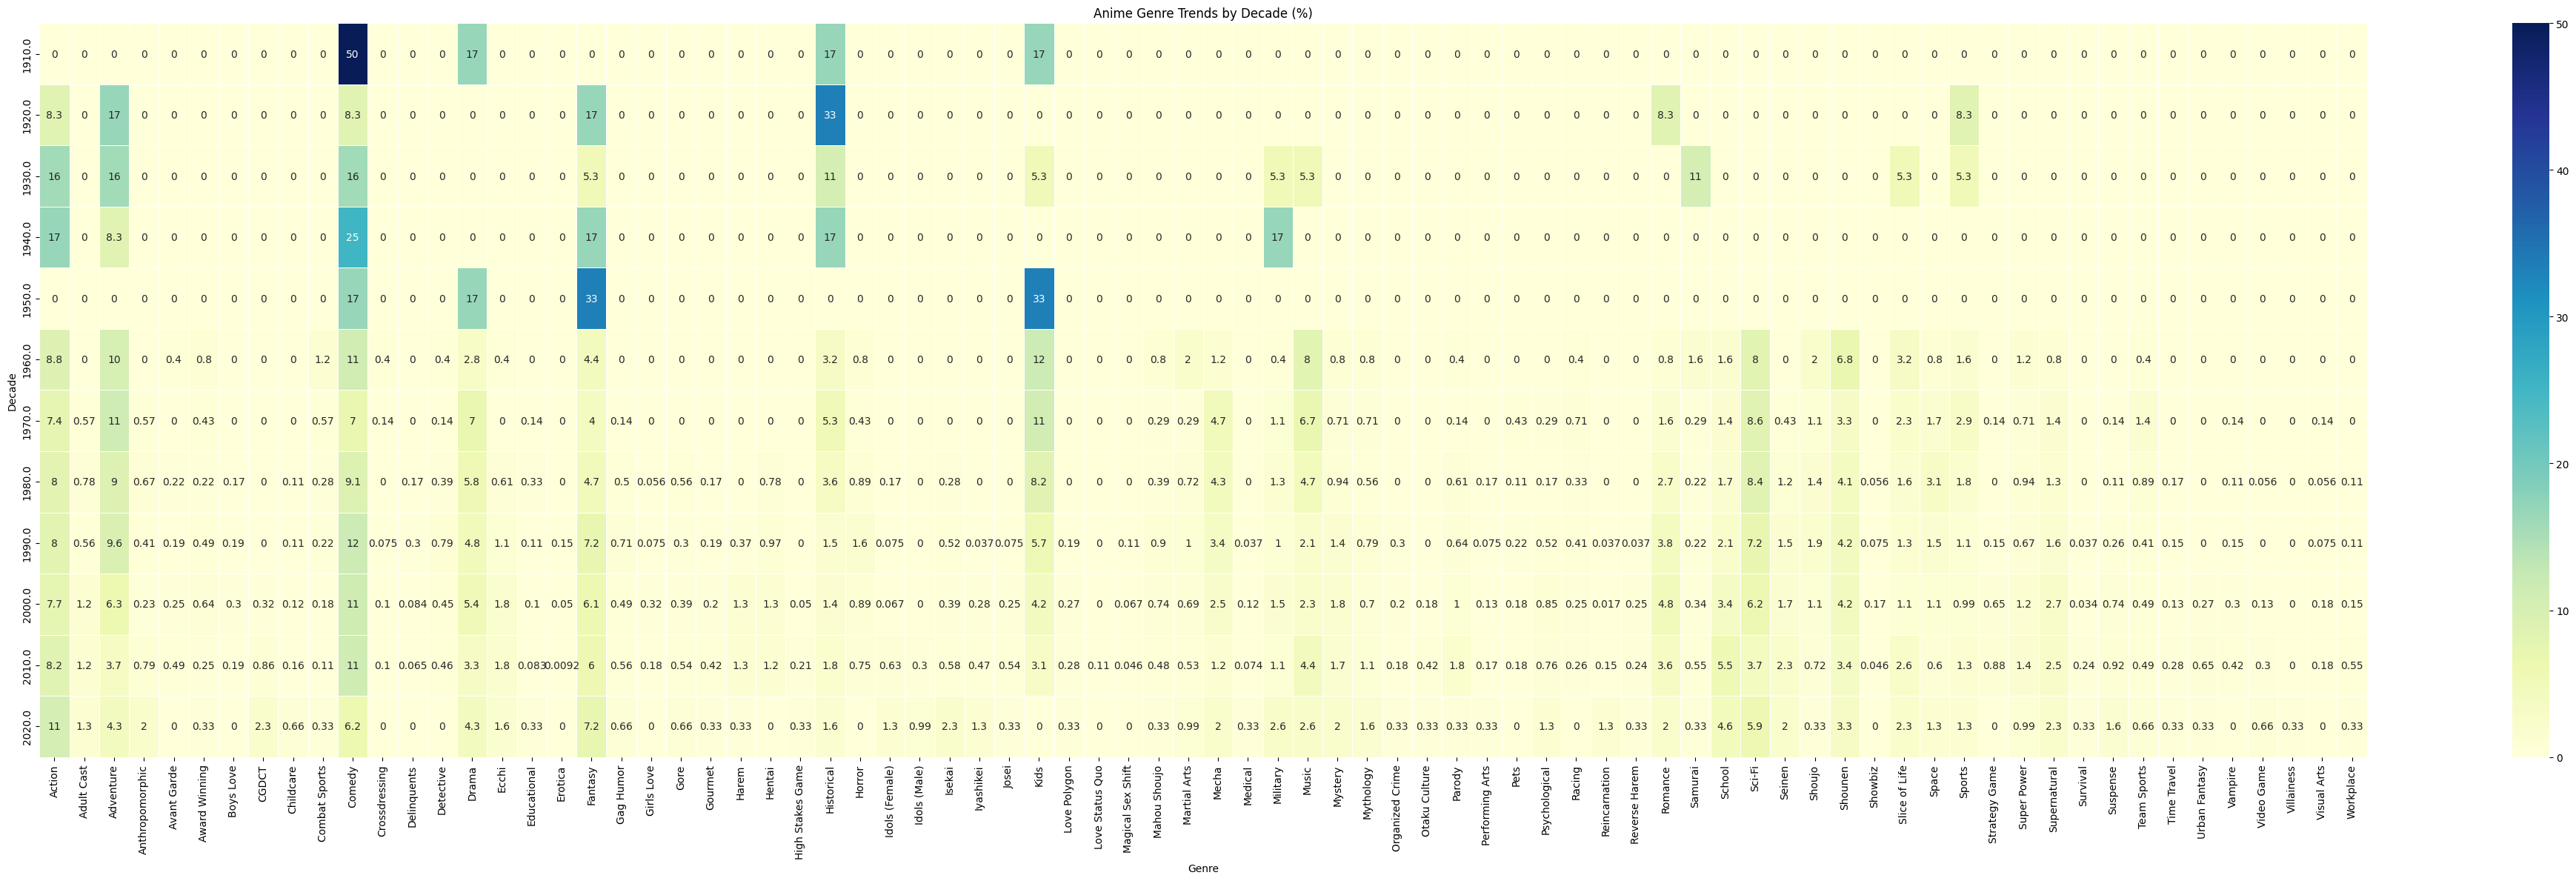

In [7]:
# ### Genre Trends Over the Decade
# Explored the prevalence of genres in each decade.t_year', 'num_list_users'], inplace=True)

genre_trends = df_genre.groupby(['decade', 'genres']).size().unstack().fillna(0)
genre_trends_pct = genre_trends.div(genre_trends.sum(axis=1), axis=0) * 100

plt.figure(figsize=(40, 12))
sns.heatmap(genre_trends_pct, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Anime Genre Trends by Decade (%)')
plt.xlabel('Genre')
plt.ylabel('Decade')
plt.tight_layout()
plt.show()

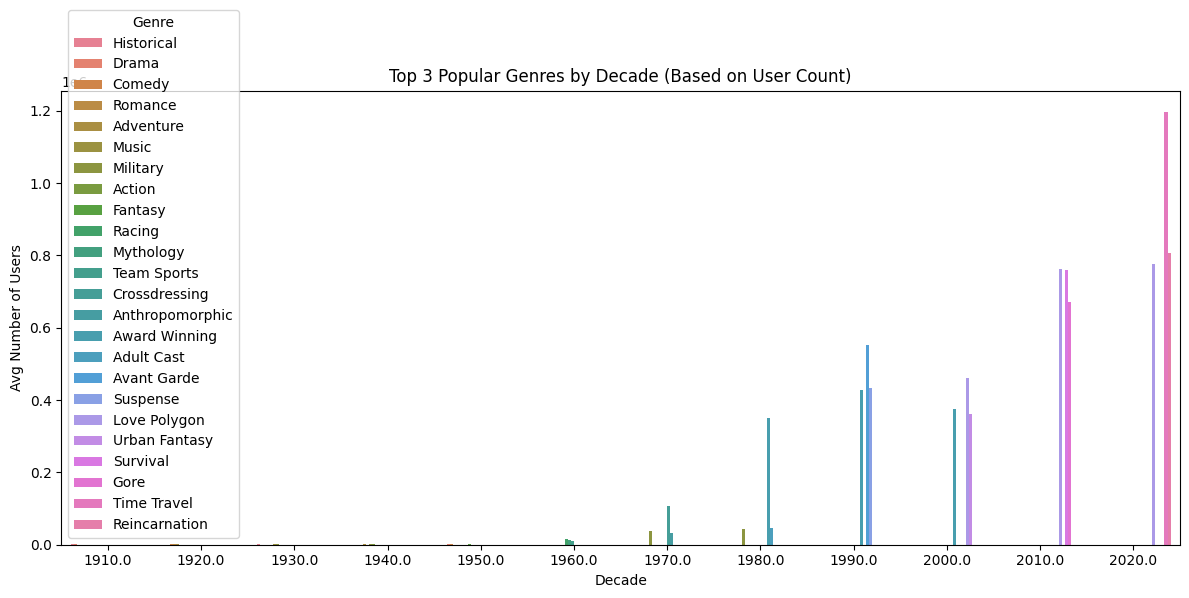

In [8]:
df_genre_decade = df.explode('genres')
top_genres_by_decade = df_genre_decade.groupby(['decade', 'genres'])['num_list_users'].mean().reset_index()

top_3 = top_genres_by_decade.sort_values(['decade', 'num_list_users'], ascending=[True, False])
top_3 = top_3.groupby('decade').head(3)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_3, x='decade', y='num_list_users', hue='genres')
plt.title('Top 3 Popular Genres by Decade (Based on User Count)')
plt.ylabel('Avg Number of Users')
plt.xlabel('Decade')
plt.legend(title='Genre')
plt.tight_layout()
plt.show()


In [9]:
hidden_gems = df[(df['mean'] >= 8.0) & (df['num_list_users'] < 50000)]
hidden_gems_sorted = hidden_gems[['title', 'mean', 'num_list_users']].sort_values(by='mean', ascending=False)

print("Top 10 Hidden Gems:")
print(hidden_gems_sorted.head(10))


Top 10 Hidden Gems:
                                                   title  mean  num_list_users
8208      Gintama: Yorinuki Gintama-san on Theater 2D???  8.42         46256.0
3839              Ramayana: The Legend of Prince Rama???  8.39         13384.0
13981                 Girls & Panzer: Saishuushou Part 4  8.36         21593.0
13196                             Douluo Dalu 2nd Season  8.34         22324.0
13960                                 Kawaki wo Ameku???  8.31         29577.0
6051   Doraemon Movie 31: Shin Nobita to Tetsujin Hei...  8.29         18956.0
6427                              Major: World Series???  8.28         38312.0
12324  Ginga Eiyuu Densetsu: Die Neue These - Seiran ...  8.28         28510.0
5698                 Gintama: Shinyaku Benizakura-hen???  8.28         45893.0
1964                              Tanoshii Muumin Ikka!!  8.27         30196.0


# ## 📊 Bivariate Analysis

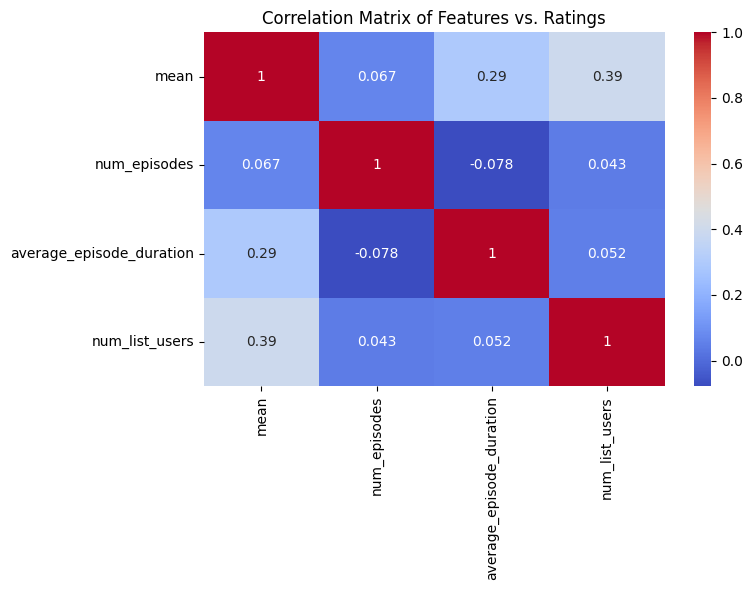

In [10]:
# ### Correlation with High Ratings
num_df = df[['mean', 'num_episodes', 'average_episode_duration', 'num_list_users']]

plt.figure(figsize=(8,6))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features vs. Ratings')
plt.tight_layout()
plt.show()

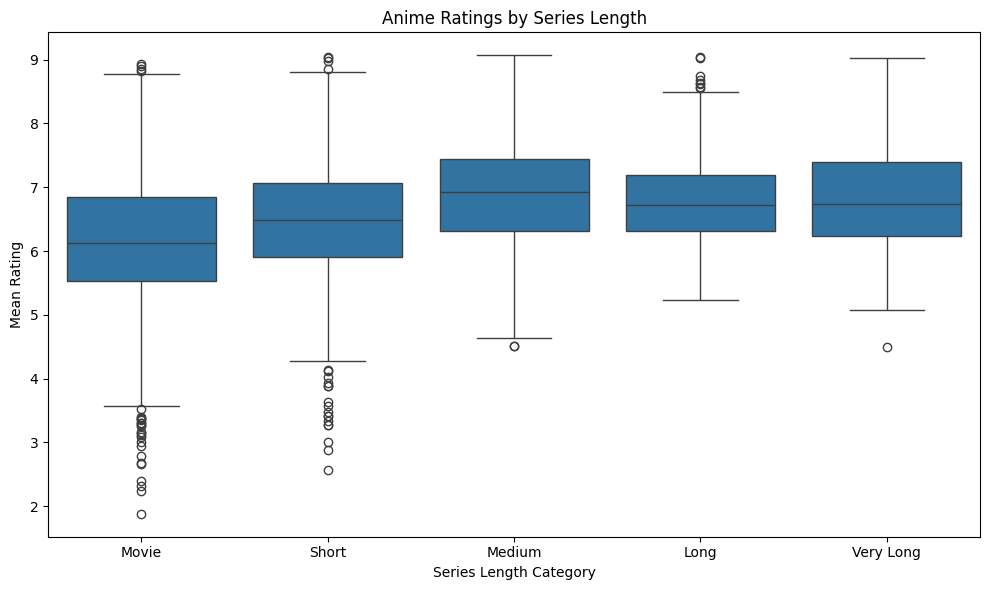

In [11]:
# ### Ratings by Series Length
# Analyzed how number of episodes affects average ratings
df['length_category'] = pd.cut(df['num_episodes'],
    bins=[0, 1, 13, 26, 52, np.inf],
    labels=['Movie', 'Short', 'Medium', 'Long', 'Very Long'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='length_category', y='mean', data=df)
plt.title('Anime Ratings by Series Length')
plt.xlabel('Series Length Category')
plt.ylabel('Mean Rating')
plt.tight_layout()
plt.show()

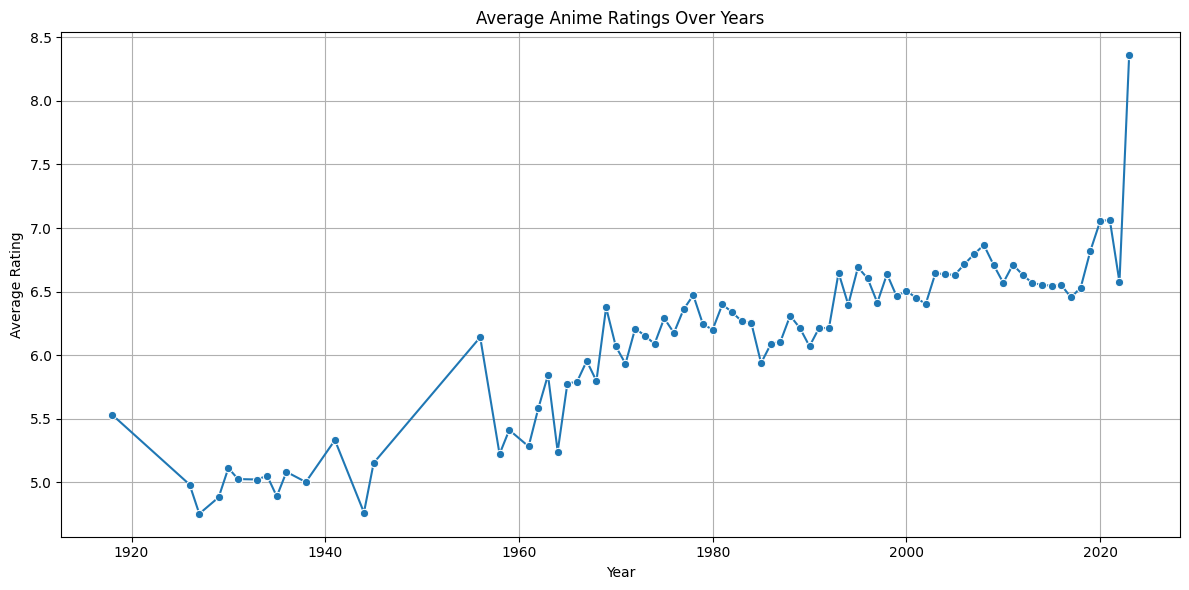

In [12]:
# Ensure start_year is extracted from datetime
df['start_year'] = pd.to_datetime(df['start_date'], errors='coerce').dt.year

# Group by year and calculate average rating
yearly_rating = df.groupby('start_year')['mean'].mean().dropna()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_rating.index, y=yearly_rating.values, marker='o')
plt.title('Average Anime Ratings Over Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 2000x1000 with 0 Axes>

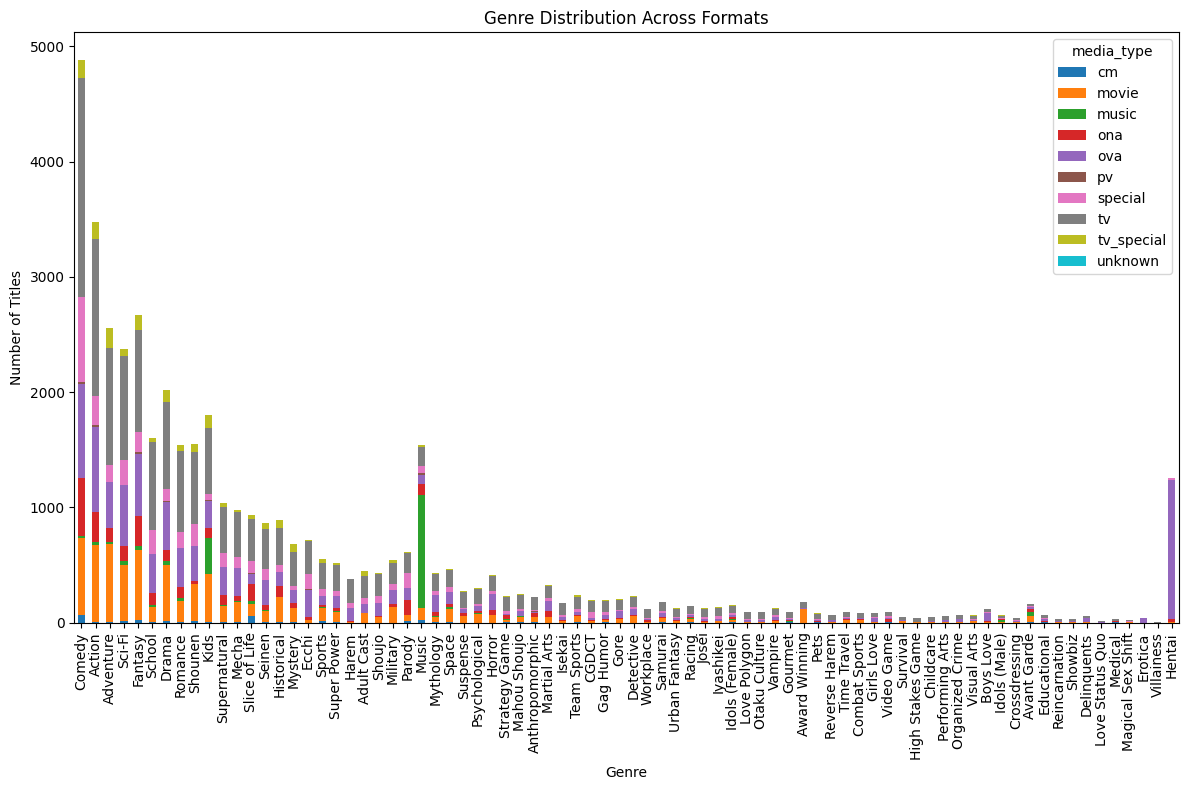

In [13]:
df_genre_format = df.explode('genres')
genre_format_count = df_genre_format.groupby(['genres', 'media_type']).size().unstack().fillna(0)

plt.figure(figsize=(20, 10))
genre_format_count.sort_values(by='tv', ascending=False).plot(kind='bar', stacked=True, figsize=(12,8))
plt.title('Genre Distribution Across Formats')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()


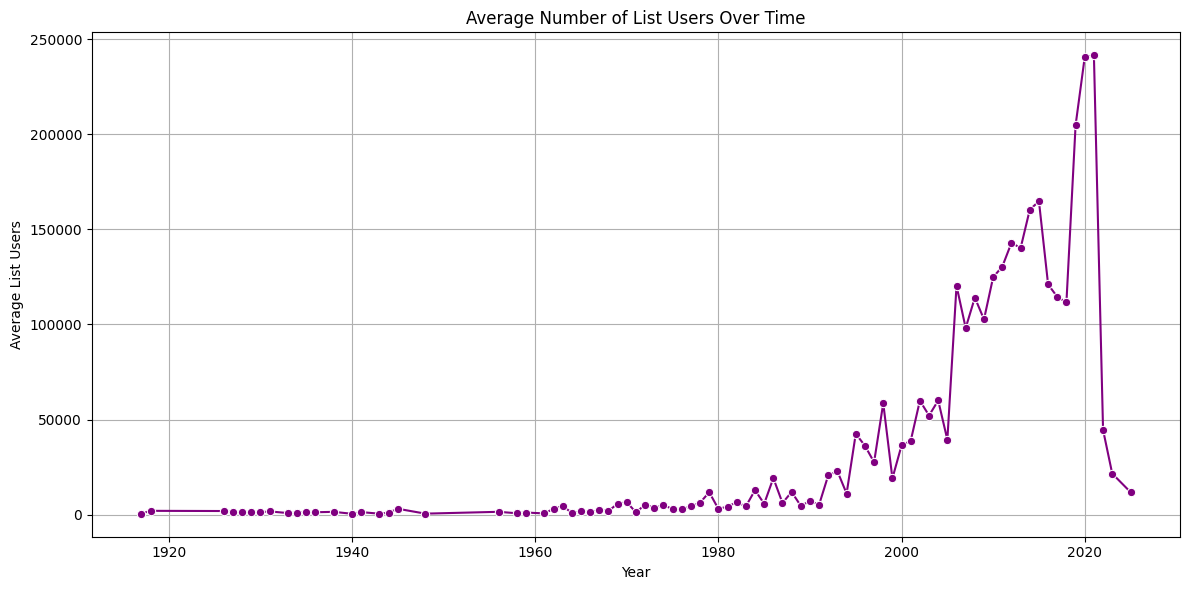

In [14]:
# Ensure start_date is in datetime format
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')

# Extract year from start_date
df['start_year'] = df['start_date'].dt.year

# Group by extracted year and calculate average number of list users
user_trend = df.groupby('start_year')['num_list_users'].mean().dropna()

# Plotting the trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=user_trend.index, y=user_trend.values, marker='o', color='purple')
plt.title('Average Number of List Users Over Time')
plt.xlabel('Year')
plt.ylabel('Average List Users')
plt.grid(True)
plt.tight_layout()
plt.show()


# ##Visualization

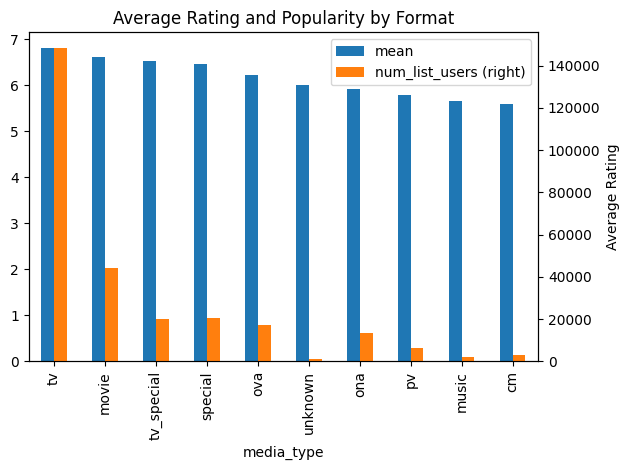

In [15]:
# ### Format Popularity and Reception
# Compared popularity and ratings of media types
format_ratings = df.groupby('media_type').agg({
    'mean': 'mean',
    'num_list_users': 'mean'
}).sort_values(by='mean', ascending=False)

format_ratings.plot(kind='bar', secondary_y='num_list_users')
plt.title('Average Rating and Popularity by Format')
plt.ylabel('Average Rating')
plt.xlabel('Media Type')
plt.tight_layout()
plt.show()

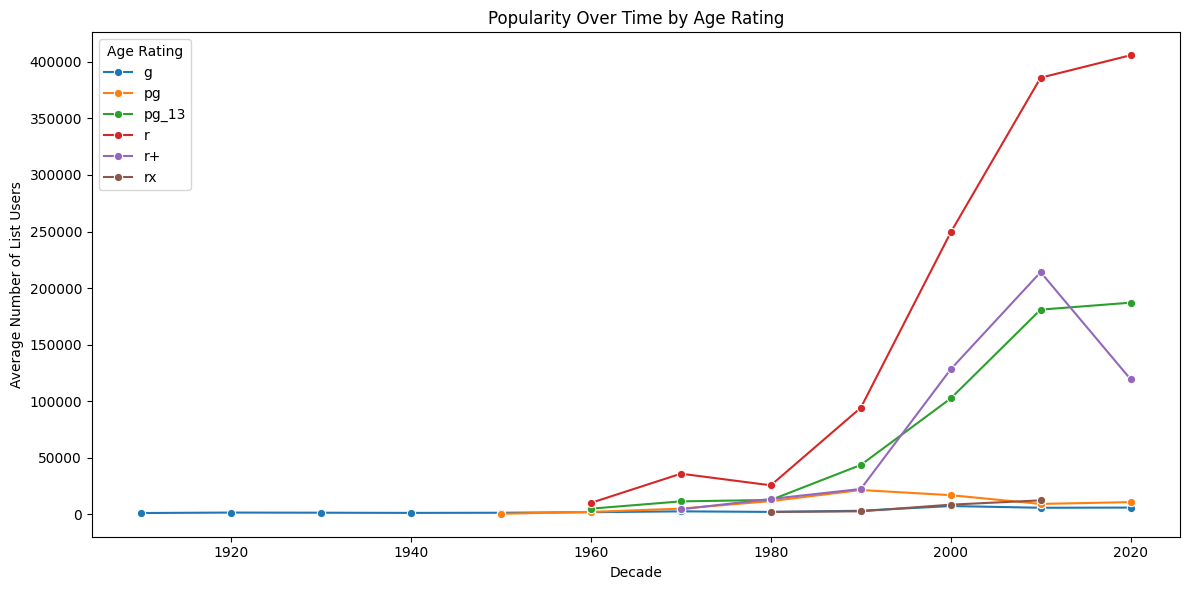

In [16]:
# ### Age Rating Popularity Over Time
age_trend = df.groupby(['rating', 'decade'])['num_list_users'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=age_trend, x='decade', y='num_list_users', hue='rating', marker='o')
plt.title('Popularity Over Time by Age Rating')
plt.ylabel('Average Number of List Users')
plt.xlabel('Decade')
plt.legend(title='Age Rating')
plt.tight_layout()
plt.show()

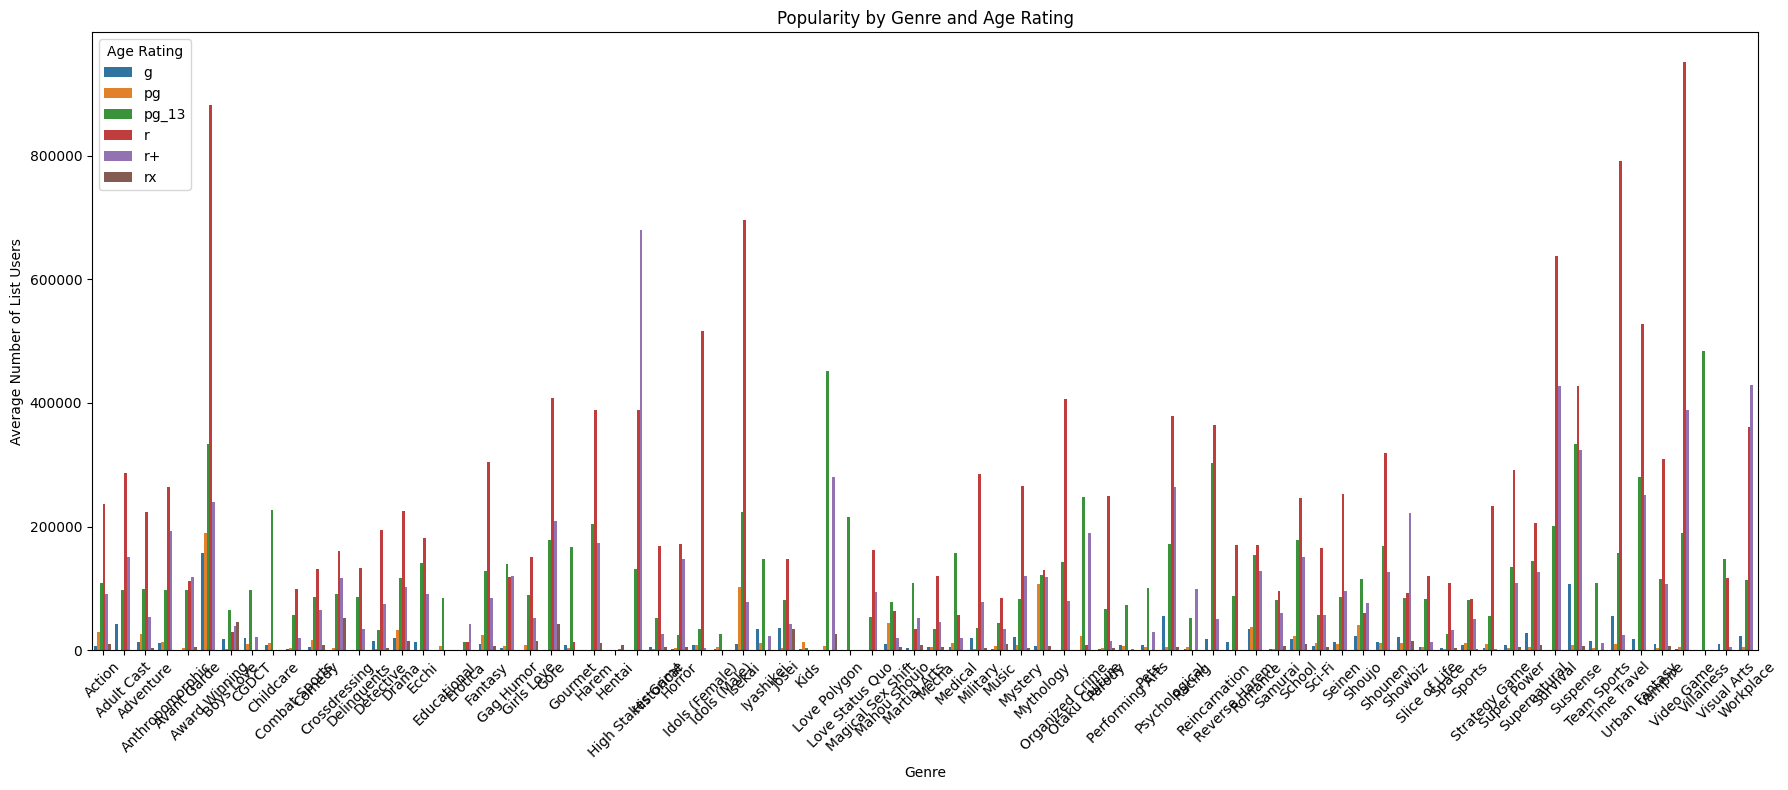

In [17]:
# ### Age Rating vs Genre Popularity
df_genre_age = df.explode('genres')

popularity = df_genre_age.groupby(['genres', 'rating'])['num_list_users'].mean().reset_index()

plt.figure(figsize=(18, 8))
sns.barplot(data=popularity, x='genres', y='num_list_users', hue='rating')
plt.title('Popularity by Genre and Age Rating')
plt.xticks(rotation=45)
plt.ylabel('Average Number of List Users')
plt.xlabel('Genre')
plt.legend(title='Age Rating')
plt.tight_layout()
plt.show()

# ##Conclusions

# #Anime Genre Trends by Decade(%)(GRAPH 1)

1. Comedy is a consistent leader

Percentages:

1980s: ~24.8%

1990s: ~23.0%

2000s: ~18.4%

2010s: ~18.5%


Conclusion: Comedy remains one of the most dominant genres over decades, although it slightly decreased in the 2000s–2010s.

Reasoning: This consistency indicates that light-hearted, humorous content has broad and enduring appeal across generations.



---

2. Action genre rises and stabilizes

Percentages:

1980s: ~13.7%

1990s: ~13.0%

2000s: ~13.8%

2010s: ~13.2%


Conclusion: Action has maintained a stable presence since the 1980s, which implies continued viewer interest in high-energy, plot-driven stories.

Reasoning: Despite the evolution in art and storytelling, demand for action remains robust and unchanged.



---

3. Sci-Fi and Mecha peak in the 1980s and decline afterward

Sci-Fi:

1980s: ~10.5%

2010s: ~5.0%


Mecha:

1980s: ~8.7%

2010s: ~1.6%


Conclusion: These genres were dominant in the 80s (e.g., Gundam, Macross) but lost traction in later decades.

Reasoning: As newer genres and formats emerged, audience preferences shifted to genres like Fantasy, Slice of Life, and Isekai.



---

4. Slice of Life shows significant growth

Percentages:

1980s: ~0.5%

2000s: ~3.4%

2010s: ~6.5%


Conclusion: Slice of Life experienced a rapid increase, showing modern viewers’ preference for relatable, everyday themes.

Reasoning: This trend mirrors the rising demand for realistic and character-driven storytelling over epic narratives.



---

5. Fantasy genre saw major growth from 2000s onwards

Percentages:

1980s: ~3.0%

2000s: ~8.2%

2010s: ~9.8%


Conclusion: Fantasy became highly popular in the 21st century, likely due to the global success of shows like "Sword Art Online", "Re:Zero", and other isekai titles.

Reasoning: Technological improvements and storytelling freedom helped fantasy flourish.



---

6. Isekai and Game genres emerge only in recent decades

Isekai:

2000s: ~0.2%

2010s: ~2.7%

2020s: ~3.0%


Game:

1990s: ~0.5%

2000s: ~1.5%

2010s: ~2.4%


Conclusion: These are modern phenomena, becoming popular due to trends in gaming culture and alternate-world storytelling.

Reasoning: Their rise aligns with the growth of online gaming, MMORPGs, and virtual reality themes.



---

7. Romance remains stable but not dominant

Percentages:

1980s: ~5.3%

2000s: ~5.1%

2010s: ~5.3%


Conclusion: Romance shows a steady fanbase but doesn't dominate, likely because it’s often a subplot rather than a main genre.

Reasoning: It remains relevant through hybrid genres like Romantic Comedy or Drama.



---

8. Genres like Hentai, Yaoi, Shounen Ai stay marginal

Most values <1% across all decades.

Conclusion: These genres cater to niche audiences and haven’t expanded in mainstream spaces.

Reasoning: Cultural sensitivity and platform restrictions likely limit their spread.


# ### Top 3 Popular Genres by Decade (Graph 2)

Conclusion:

• Anime genre preferences have shifted significantly over the decades.

• From 2000s onward, Action, Adventure, and Romance became consistently popular.

• In the 2010s, genres like Action and Adventure saw average user counts well over 600,000.

Reasoning:

• The height of the bars in recent decades is significantly higher than earlier ones, indicating higher user engagement.

• This could be due to the global rise in anime popularity and access via streaming platforms in the 2010s and 2020s.  

# ### Correlation Matrix of Features vs. Ratings (Graph 3)

Conclusion:

• Average rating has a moderate positive correlation with:

Average episode duration (r 0.3)

• Number of users who listed the anime (r ~ 0.39)

• Weak or negligible correlation with:

• Number of episodes (r 0.074)

Reasoning:

• These values suggest longer episodes and more users tend to slightly correlate with higher ratings.

• The number of episodes doesn't significantly affect ratings-quality seems to outweigh quantity.

# ###Anime Rating by Series Length (Graph 4)

1. Medium-length anime are rated the highest on average (Median ~7.0), possibly because:

They have enough time to develop story and characters effectively.

They maintain viewer engagement without overstaying their welcome.



2. Movies have the lowest median rating (~6.2) and most outliers on the lower end, possibly due to:

Time constraints affecting story depth.

Risk of high expectations and disappointing delivery.



3. Short and Long series are rated similarly (~6.7), but Short ones have greater rating variance, indicating mixed reception — possibly due to experimental or niche content.

# ### Average Anime Ratings Over Years (Graph 5)

Conclusion:

• There is a steady increase in average ratings over the years.

Early years (1920s-1940s): average rating around 5.0-5.5

• Recent years (2020+): average rating close to 7.0

Reasoning:

• Improvements in animation quality, storytelling, and global accessibility likely contribute to higher recent ratings.

• Viewer base may also be more engaged and passionate now, leading to better reception and scoring.

# ###Genre Distribution Across Formats (Graph 6)

Conclusions:

Top Genres: Comedy, Action, Adventure, and Fantasy are the most common genres.

Media Type Dominance:

TV format dominates the most popular genres like Comedy (~7500 titles), Action (~5000), and Fantasy (~4500).

Movies and OVAs are less represented comparatively.

Certain genres like “Music” and “Hentai” are mostly associated with non-TV formats.


Sparse Genres: A long tail of genres like “Kids,” “Shoujo Ai,” “Yaoi,” and “Historical” has significantly fewer titles.


Reasoning: The popularity of genres like Comedy and Action in the TV format implies that mainstream genres are produced more frequently for television, possibly due to broader audience appeal and commercial viability.


# ### Average Number of List Users Over Time (Graph 7)

Conclusions:

A significant increase in users starts around the 1990s, peaking between 2010 and 2015 with over 80,000 average users, then declining post-2016.

Very low engagement before 1980 (below 10,000 users).


Reasoning: The rise corresponds with the global surge in anime popularity (e.g., "Naruto", "Attack on Titan", "One Piece") and the accessibility of streaming platforms. The post-2015 drop could be due to data incompleteness, newer titles having less time to accumulate users, or market saturation.



# ### Average Rating and Popularity by Format (Graph 8)

Conclusions:

Top Rated Formats: TV and Movies (around 6.9/10).

Most Popular: TV shows have the highest number of users (~135,000), while Movies are next.

Formats like ONA, OVA, Music, CM (commercials) have lower ratings (~6.0–6.5) and much lower user counts.


Reasoning: TV series offer ongoing stories and more engagement, leading to higher user interaction and visibility. Movies generally have higher production quality, thus receiving better ratings but still lower popularity due to shorter format and limited accessibility.                                        


# ###Popularity Over Time by Age Rating (Graph 9)

Observations:

R-rated (r) and R+ (restricted 17+) anime experienced a huge surge from the 1990s to 2010s.

R+ peaked around 240,000 average list users in the 2010s.


PG-13 and PG also grew steadily, but not as drastically.

PG-13 peaked at around 120,000 users in the 2010s.


G (general audience) remained low across all decades.

A slight dip across all categories post-2020, likely due to dataset cut-off or newer titles having fewer users.


Conclusion: Anime targeted at older audiences (R, R+) became significantly more popular from the 2000s onward, likely due to mature storytelling and complex themes. For example, R+ rated shows jumped from ~45,000 in 2000s to over 240,000 in the 2010s.

# ###Popularity by Genre and Age Rating (Graph 10)

Observations:

Genres like Action, Adventure, Fantasy, and Shounen dominate in terms of list users.

Action anime under R+ and PG-13 ratings reach over 800,000+ users.


Romance, Drama, and Slice of Life also show high popularity across PG-13 and R+.

Genres like Harem, Yaoi, Shoujo Ai, and Josei have moderate engagement, primarily under R+ or PG-13.

Adult/Explicit genres (e.g., RX) are less popular in terms of user count.


Conclusion: Mainstream genres like Action, Adventure, and Fantasy combined with PG-13 or R+ ratings attract the largest audiences. This suggests that viewers prefer exciting, slightly mature content. For instance, Action-R+ has nearly 850,000 users, whereas RX-rated genres don't surpass 100,000.    